# Loglinearizalt RBC modell - impulzus-valasz fuggvenyek Uhlig algoritmussal

## Definialjuk a parametereket

In [1]:
# Eloadason kalibralt parameterek
alpha = 0.44
beta = 0.964
delta = 0.054
# Preferencia parameterek a szakirodalomnak megfeleloen
theta = 1.5
psi = 0
rho = 0.85
sigma = 0.05

omega = alpha*beta/(1-beta*(1-delta));

## Definialjuk a szukseges egyutthato matrixokat
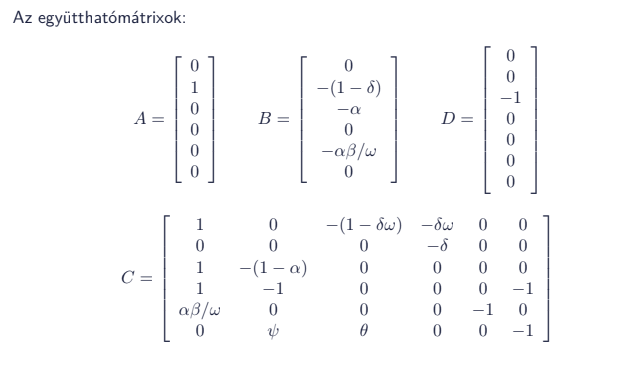
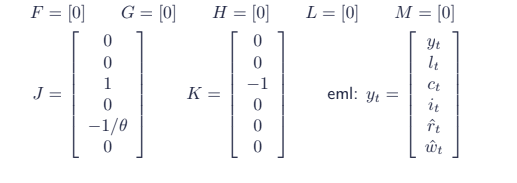

In [2]:
import numpy as np

A = np.matrix([0, 1, 0, 0, 0, 0]).T
B = np.matrix([0, -(1-delta), -alpha, 0, -alpha*beta/omega, 0]).T
C = np.matrix([[1, 0, -(1-delta*omega), -delta*omega, 0, 0],
          [0, 0, 0, -delta, 0, 0],
          [1, -(1-alpha), 0, 0, 0, 0],      
          [1, -1, 0, 0, 0, -1],
          [alpha*beta/omega, 0, 0, 0, -1, 0],
          [0, psi, theta, 0, 0, -1]])
D = np.matrix([0, 0, -1, 0, 0, 0]).T
F = np.matrix([0])
G = np.matrix([0])
H = np.matrix([0])
J = np.matrix([0, 0, 1, 0, -1/theta, 0])
K = np.matrix([0, 0, -1,   0,  0,  0])
L = np.matrix([0])
M = np.matrix([0])
N = np.matrix([rho])

## Szamitsuk ki a megfelelo egyutthatomatrixokat
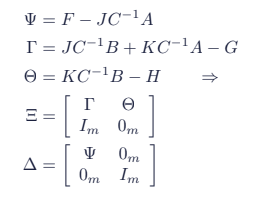

In [3]:
# Matrixok merete
m, ee = F.shape
n, de = C.shape
k, xe = N.shape

# Matrixok definialasa
Cinv = C.I
PSI = F - J*Cinv*A;
GAMMA = J*Cinv*B + K*Cinv*A - G;
THETA = K*Cinv*B - H;
XI = np.matrix(np.concatenate((
    np.concatenate((GAMMA, THETA), axis = 1),
    np.concatenate((np.identity(m), np.zeros((m,m))), axis=1)), axis=0))
DELTA= np.matrix(np.concatenate((
    np.concatenate((PSI, np.zeros((m,m))), axis = 1),
    np.concatenate((np.zeros((m,m)), np.identity(m)), axis=1)), axis=0))

## Generalizalt sajatertek problema megoldasa

In [4]:
from scipy.linalg import eig
eigvals, eigvecs = eig(XI, DELTA)

In [5]:
# Ellenorizzuk

In [6]:
XI*eigvecs

matrix([[ 1.7627244 , -1.21587394],
        [-0.75562017,  0.66864544]])

In [7]:
DELTA*eigvecs*np.diag(eigvals)

matrix([[ 1.7627244 +0.j, -1.21587394+0.j],
        [-0.75562017+0.j,  0.66864544+0.j]])

In [8]:
eigvals

array([1.15360091+0.j, 0.89922294+0.j])

In [9]:
eigvecs

array([[-0.75562017,  0.66864544],
       [-0.65501004,  0.74358139]])

In [10]:
# 0.8992 lesz a stabil sajatertek
LAMBDA = np.matrix([abs(eigvals[1])])
OMEGA = np.matrix([abs(eigvecs[1,1])])

## Parameterek kiszamitasa:
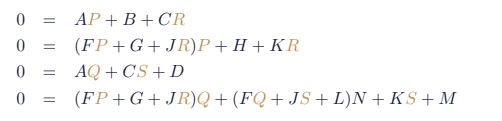

In [11]:
P = OMEGA*LAMBDA/OMEGA
R = -Cinv*(A*P+B)

V = np.concatenate((
    np.concatenate((np.kron(np.identity(k),A), 
                    np.kron(np.identity(k),C)), axis=1),
    np.concatenate((np.kron(N.T,F)+np.kron(np.identity(k),(F*P+J*R+G)), 
                    np.kron(N.T,J)+np.kron(np.identity(k),K)), axis=1)), axis=0)
LN_plus_M = L*N + M;
QS_vec = (-V).I*np.concatenate((D, LN_plus_M), axis=0)
Q = QS_vec[0]
S = QS_vec[1:]

## Impulzus-valasz fuggvenyek

Text(0, 0.5, 'rho')

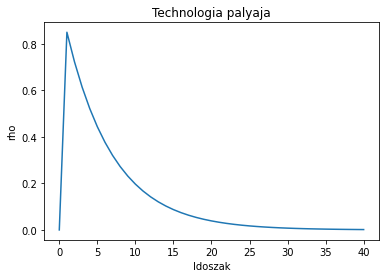

In [12]:
import matplotlib.pyplot as plt

# A technologia egy szorasnyi sokkot kap
nper = 40;
z = [0, rho]
for i in range(nper-1):
    z.append(rho*z[-1])
    
fig = plt.figure()
axs = plt.axes()
axs.plot(range(len(z)),z)
axs.set_title('Technologia palyaja')
axs.set_xlabel('Idoszak')
axs.set_ylabel('rho')

Text(0, 0.5, 'K')

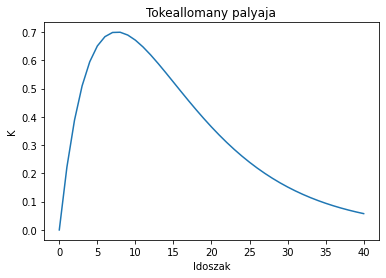

In [16]:
# Az allapotvaltozo (k) palyaja
K = [0]
for t in range(nper):
    K.append(P*K[t] + Q*z[t+1])

fig = plt.figure()
axs = plt.axes()
axs.plot(range(len(K)),K)
axs.set_title('Tokeallomany palyaja')
axs.set_xlabel('Idoszak')
axs.set_ylabel('K')

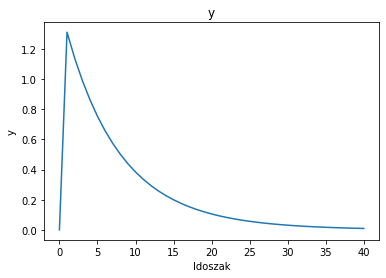

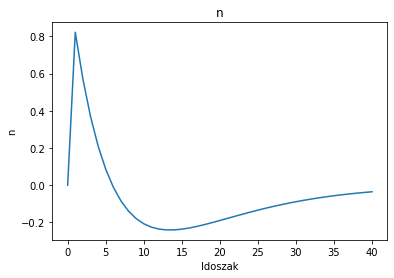

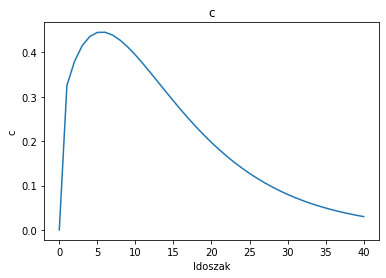

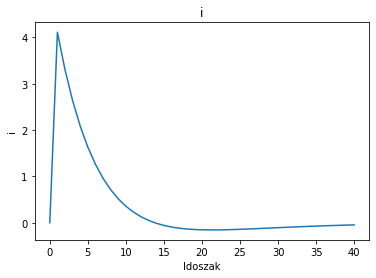

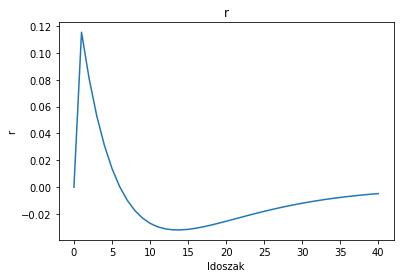

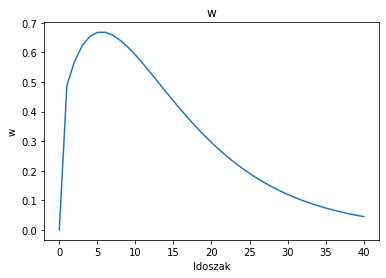

In [14]:
# A tobbi endogen valtozo palyaja
y = np.zeros((nper+1, n))
y[1,:] = R.T*K[0] + S.T*z[1]
for t in range(nper-1):
    y[t+2,:] = R.T*K[t+1][0,0] + S.T*z[t+2]

legend_y = ['y', 'n', 'c', 'i', 'r', 'w']    

for i in range(n):
    fig = plt.figure()
    axs = plt.axes()
    axs.plot(range(len(y[:,i])),y[:,i])
    axs.set_title(legend_y[i])
    axs.set_xlabel('Idoszak')
    axs.set_ylabel(legend_y[i])